In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import opinion_lexicon
from nltk.sentiment.util import mark_negation

In [6]:
file_name = "filtered_word_frequencies_pt2.xlsx"
data = pd.read_excel(file_name)

In [7]:
print(data.head()) # just checkin' lol

      Word  Frequency
0  already          1
1     know         17
2       im         31
3   rockin          1
4    nigga          4


In [8]:
from nltk.corpus import opinion_lexicon # using prebuilt lexicons
from nltk.tokenize import word_tokenize

In [9]:
import nltk
nltk.download('opinion_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/jei/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.
[nltk_data] Downloading package punkt to /Users/jei/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
def get_sentiment(word):
    if word in opinion_lexicon.positive():
        return 1
    elif word in opinion_lexicon.negative():
        return -1
    else:
        return 0

In [11]:
data["Sentiment"] = data["Word"].apply(get_sentiment)

In [12]:
data["Weighted Sentiment"] = data["Sentiment"] * data["Frequency"]
total_sentiment = data["Weighted Sentiment"].sum()
print(f"Total Sentiment Score: {total_sentiment}")

Total Sentiment Score: -10


In [14]:
output_file = "sentiment_analysis_results.xlsx"
data.to_excel(output_file, index=False)
print(f"Sentiment analysis results saved to {output_file}.")

Sentiment analysis results saved to sentiment_analysis_results.xlsx.


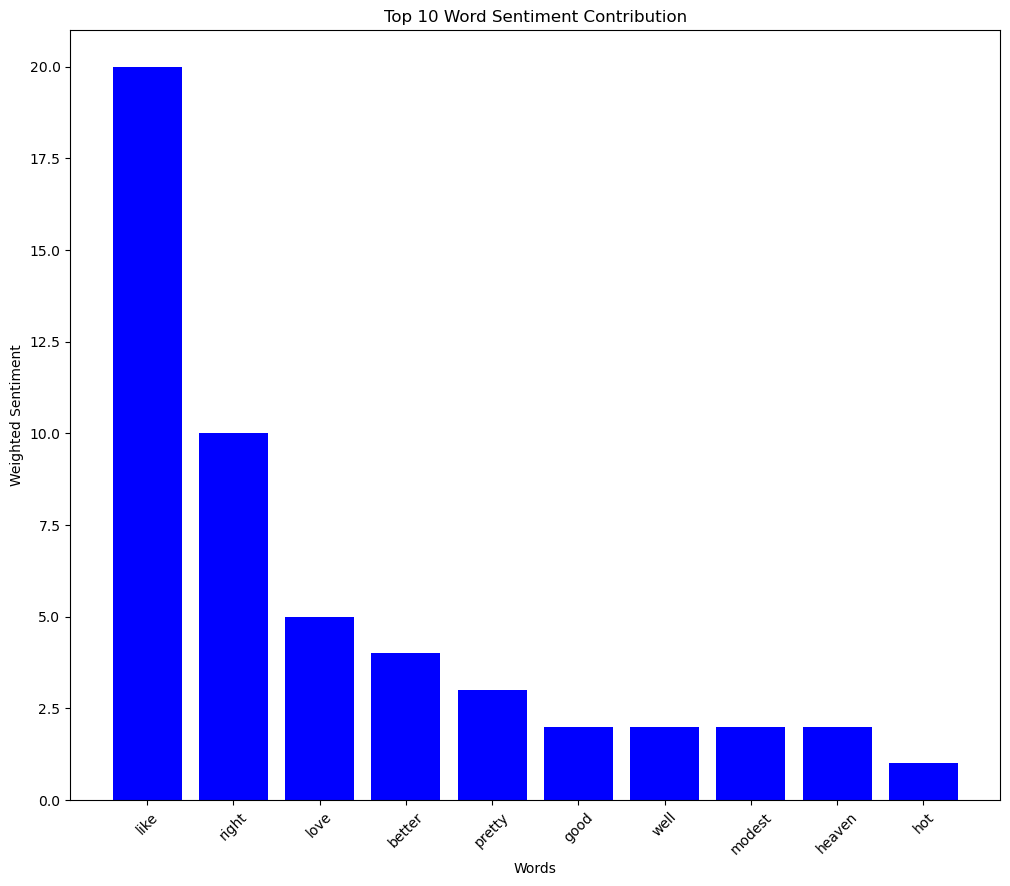

In [23]:
plt.figure(figsize=(12, 10))
top_words = sorted_data.head(10)
plt.bar(top_words["Word"], top_words["Weighted Sentiment"], color="blue")
plt.xlabel("Words")
plt.ylabel("Weighted Sentiment")
plt.title("Top 10 Word Sentiment Contribution")
plt.xticks(rotation=45)
plt.show()

While the overall sentiment across my lyrics leans negative, I’m not too surprised. Much of the music I write comes from processing difficult emotions, which likely contributes to the negative sentiment. That said, this analysis is purely lexicon-based and does not account for nuance, context, or the deeper layers of meaning typically found in human language and context-aware analysis. To address this, I plan to use BERT or another machine learning model in a future phase of this project. These models are more contextually aware and better suited for analyzing dense, context-rich content like my lyrics.